<module 'matplotlib.pyplot' from 'C:\\Users\\Alex\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

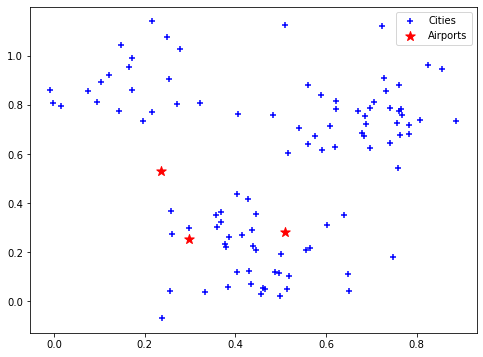

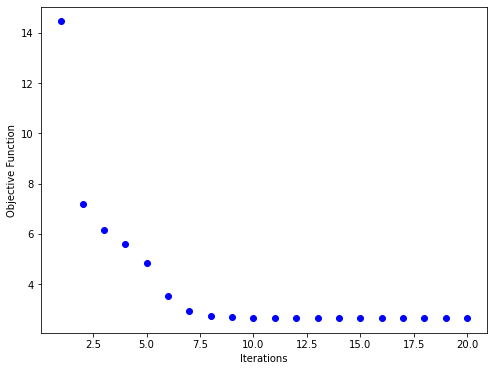

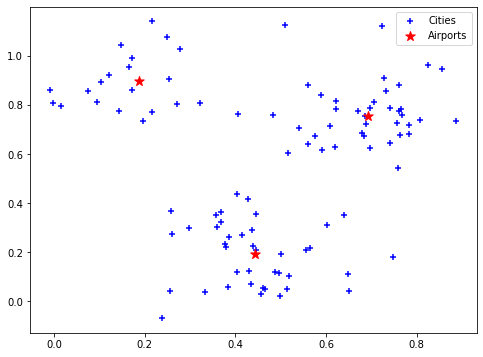

In [24]:
# Alexander Ly 027744520
# CECS 451 Sec 01
# Assignment 3 - Gradient Based Optimization
# February 23, 2024

import random
import numpy as np
import matplotlib.pyplot as plt

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []
alpha = 0.01
iterations = 20

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city // num_center)
    yc = np.random.normal(y, sigma, num_city // num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append([x, y])

plt.figure(figsize=(8, 6))
zip_cities = list(zip(*cities))
plt.scatter(zip_cities[0], zip_cities[1], marker='+', color='b', label='Cities')
zip_airs = list(zip(*airports))
plt.scatter(zip_airs[0], zip_airs[1], marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

# implement objective function to determine minimization at each iteration
def objective_function(airports, cities):
    # set distance variable to 0
    distance = 0
    # iterate through cities 
    for city in cities:
        # create a list for the distances
        city_distances = []
        # iterate through each airport
        for airport in airports:
            # minimize objective function
            minimzation_function = (city[0] - airport[0])**2 + (city[1] - airport[1])**2
            # append the distance to our list
            city_distances.append(minimzation_function)
        # get the lowest distance from the city 
        lowest_distance = min(city_distances)
        # add that distnace to our overall distance
        distance += lowest_distance
    return distance

# implement gradient descent to optimize our airports to best possible locations
def gradient_descent(airports, cities, alpha, iterations):
    # create a list for distnace values 
    distance_values = [] 
    # iterate through each iteration
    for i in range(iterations):
        # call the objective function to get the sum of the lowest distances
        distance = objective_function(airports, cities)
        # apped our distance values to our list
        distance_values.append(distance)
        
        # initialize the gradient for each of our airports
        gradient = [[0, 0], [0, 0], [0, 0]]
        
        # iterate through each city
        for city in cities:
            # create a list for the distances 
            city_distances = []
            # iterate through each airport
            for airport in airports:
                # minimize objective function
                minimzation_function = (city[0] - airport[0])**2 + (city[1] - airport[1])**2
                # append the distance to our list
                city_distances.append(minimzation_function)
            # get the index of the closest airport to the city
            closest_airport = city_distances.index(min(city_distances))
            # get derivative and update our gradient for our closest airport using 𝜕f/𝜕x,𝜕f/𝜕y forumla
            gradient[closest_airport][0] += 2 * (airports[closest_airport][0] - city[0])
            gradient[closest_airport][1] += 2 * (airports[closest_airport][1] - city[1])

        # Update our airport coordinates/positions using the formula
        for i in range(3):
            airports[i][0] = airports[i][0] - alpha * gradient[i][0]
            airports[i][1] = airports[i][1] - alpha * gradient[i][1]

    return distance_values

# run our gradient descent
gradient_optimization = gradient_descent(airports, cities, alpha, iterations)

# plot our objective function value at each iteration
plt.figure(figsize=(8, 6))
plt.scatter(range(1, iterations + 1), gradient_optimization, marker='o', color='b')
plt.xlabel('Iterations')
plt.ylabel('Objective Function')
plt

# plot the optimal state 
plt.figure(figsize=(8, 6))
plt.scatter(zip_cities[0], zip_cities[1], marker='+', color='b', label='Cities')
zip_airs = list(zip(*airports))
plt.scatter(zip_airs[0], zip_airs[1], marker='*', color='r', s=100, label='Airports')
plt.legend()
plt